In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score)
warnings.filterwarnings("ignore")

## Load the data

In [2]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']



## Define Multi Models


In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()   
}

## Configuring K-Fold CV

In [14]:
cv = StratifiedKFold(
    n_splits= 5,
    random_state=42,
    shuffle=True
)

In [20]:
trained_model = {}
for model_name, model in models.items():
    print(f"\n Cross validation on {model_name}")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv,
        scoring='f1',
        return_estimator=True,
        return_train_score=True
    )

    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_model[model_name] = estimator


 Cross validation on Logistic Regression

 Cross validation on Random Forest

 Cross validation on Decision Tree


In [22]:
Y_hat_tests = {}
for model_name, model in trained_model.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 0, ..., 0, 0, 1], shape=(1999,))}

In [25]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Dicison Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

KeyError: 'Dicison Tree'

Text(1314.8398692810458, 0.5, 'Actual')

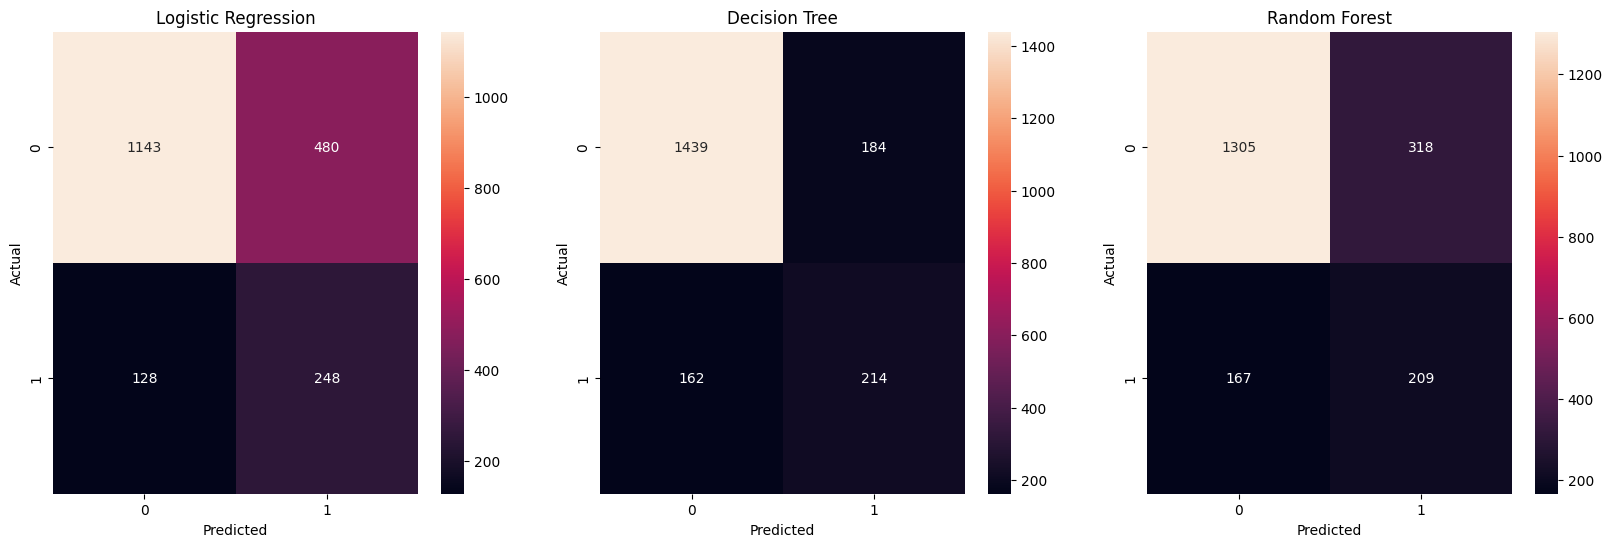

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
